In [1]:
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Lineare Regression
In der nachfolgenden Zelle werden zuerst Daten geladen, die zur Veranschaulichung der linearen Regression dienen.
Anschliessend wird ein lineares Modell mit Hilfe der der Klasse Lineare Regression aus `sklearn.linear_model` gerechnet. Die Vorhersage (d.h. die Geradengleichung) ergibt sich aus den Koeffizienten durch $y = a + bX$.

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')
model = LinearRegression()
model.fit(X, y)
y_hat = model.coef_ * X + model.intercept_

Warum wird für $\mathbf{X}$ immer ein Grossbuchstabe verwendet und für $\mathbf{y}$ ein kleiner Buchstabe ?

Die Matrix der Variablen X wird gross geschrieben, da in Matrix-Notation Matrizen immer mit grossen Buchstaben bezeichnet werden, Vektoren - so wie die abhängige Variable y - werden mit kleinen Buchstaben benannt.

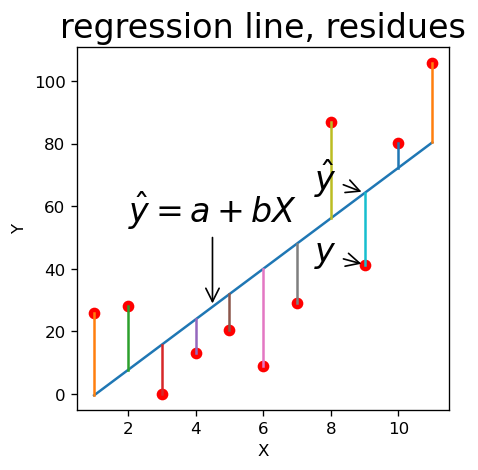

In [4]:
f = plt.figure(figsize=(4, 4), dpi=120)
plt.title(label='regression line, residues', fontdict={'fontsize':20})
axes = f.add_subplot(111)

axes.plot(X, y, 'ro', X, y_hat)
#axes = plt.gca()
axes.set_ylim([np.min(y)-5, np.max(y) +5])
for i in range(len(y)):
    plt.plot((X[i, 0], X[i, 0]), (y[i], y_hat[i]))

axes.set_xlabel('X') 
axes.set_ylabel('Y')

axes.annotate('$y$', xy=(X[-3, 0], y[-3, 0]), xycoords='data',
            xytext=(X[-3, 0] - 1.5, y[-3, 0] + 1), textcoords='data',
            size = 20, arrowprops=dict(arrowstyle="->"))

axes.annotate('$\hat{y}$', xy=(X[-3, 0], y_hat[-3, 0]), xycoords='data',
            xytext=(X[-3, 0] - 1.5, y_hat[-3, 0] + 1), textcoords='data',
            size = 20, arrowprops=dict(arrowstyle="->"))

axes.annotate('$\hat{y} = a + bX$', xy=(X[3, 0] + 0.5, model.coef_ * (X[3, 0] + 0.5) + model.intercept_),
              xycoords='data', xytext=(X[3, 0] + 0.5, 55), textcoords='data',
              horizontalalignment = 'center',
              size = 20, arrowprops=dict(arrowstyle="->"))
plt.show()

#plt.close('all')

Der Plot zeigt die berechnete Regressionsgerade, sowie die Abweichungen (die Fehler) der wirklichen Messwerte von dieser Geraden. Diese Abweichungen werden als __Residuen__ bezeichnet, weil es der Anteil der gemessenen Werte ist, der “übrig bleibt”, d.h. nicht durch das Modell erklärt werden kann. Vorhergesagte Variablen werden meist mit einem Dach (Hut) bezeichnet, sowie $\hat{y}$.

## Analytische Herleitung der Parameter der Linearen Regression

Allgemein kann man den Nullpunkt einer quadratischen Funktion bestimmen, indem man ihre erste Ableitung gleich $0$ setzt. Die erste Ableitung gibt die Steigung der Funktion an. In der Physik ist dies of die Beschleunigung. Die Steigung ist am Minimum der Funktion schliesslich $0$. Man beachte, dass quadratische Funktionen immer nur einen Maximalwert haben können.

Nachfolgend ist dieser Sachverhalt für die quadratische Funktion $f(x) = (x-1)^2$ dargestellt. Die Ableitung
$2x-2$ ist ebenfalls eingetragen. Bei dem Minimum der Funktion ist die erste Ableitung gleich $0$ (die Stelle an der der Funktionsgraph, der der ersten Ableitung und die rote, horizontale Linie sich schneiden).

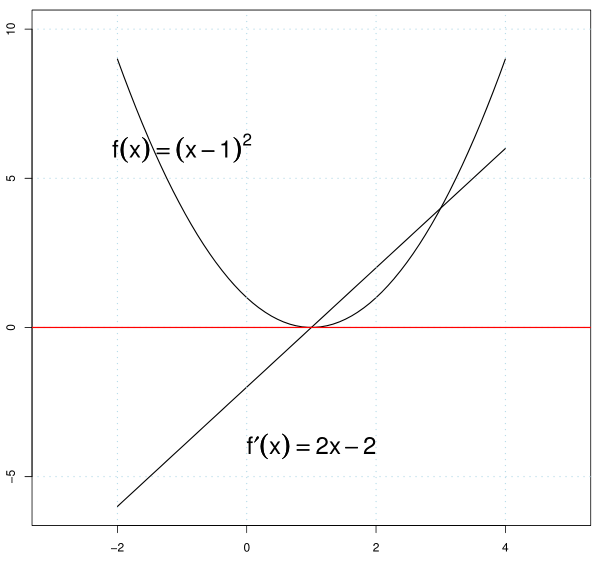

In [5]:
Image('../images/first_derivative.png')
# <img alt="taken from homepage of 20 newsgroups" caption="The different categories of the newsgroup posts" 
# id="20_newsgroups" src="../images/first_derivative.png" width="320" height="320">

Die Parameter einer linearen Regression können analytisch berechnet werden. Dazu wird der quadrierte Fehler $(y_i-\hat{y}_i)^2$ über alle Messwerte aufsummiert. Diese Summe wird nach den Parametern abgeleitet und gleich $0$ gesetzt. Somit erhält man die Stelle an der die quadratische Funktion keine Steigung (erste Ableitung ist Steigung) hat. Weil eine quadratische Funktion als einzige Nullstelle der Steigung ein Minimum hat, erhalten wir somit die Parameter an dem Minimum unserer quadratischen Fehlerfunktion.

### derivative of the error term $(y - \hat{y})^2$:
* für $\hat{y}$ können wir auch schreiben: $a + b\cdot x$, dies ist die Vorhersage mit Hilfe der Regression-Gerade (der Geraden-Gleichung):

$$\sum_i^{n}(y_i - \hat{y_i})^2 = \sum_i^{n}[y_i - (a + b\cdot x_i)]^{2}$$

* wir leiten diese Fehler-Funktion nach $a$ ab und setzen diese erste Ableitung gleich $0$ (Hierbei wird die Kettenregel verwendet):
\begin{align*}
\frac{\delta \sum_i^{n}(y_i - \hat{y_i})^2}{\delta a} = -2\sum_i^{n}y_i + 2b\sum_i^{n}x_i + 2na =& 0\\
2na =& 2\sum_i^{n}y_i - 2b\sum_i^{n}x_i\\
  a =& \frac{2\sum_i^{n}y_i}{2n} - \frac{2b\sum_i^{n}x_i}{2n}
\end{align*}

* die Summe über alle $x_i$ geteilt durch $n$ -- die Anzahl aller Beobachtungen -- ergibt den Mittelwert $\bar{x}$, gleiches gilt für $\bar{y}$:

$$a = \bar{y} - b\bar{x}$$

* die Lösung für $b$ ergibt sich analog; hier ersetzen wir $a$ mit obigen Ergebnis und erhalten:

$$ b = \frac{\frac{1}{n}\sum_i^n(x_i - \bar{x})(y_i - \bar{y})}{\frac{1}{n}\sum_i^n (x_i - \bar{x})^2} = 
\frac{\text{cov}_{xy}}{\text{var}_x}$$

* Vereinfacht ist die Former: Kovarianz der beiden Variablen $x$ und $y$ geteilt durch die Varianz von $x$.

Nachfolgend wird demonstriert, wie die hergeleiteten Formeln, in python angewendet dieselben Parameter-Schätzer ergeben wie die aus der Klasse `LineareRegression` aus `sklearn.linear_model`. Dies soll einfach nur demonstrieren, dass die alles ganz leicht zu rechnen ist und keiner komplizierten Algorithmen bedarf.

In [6]:
# we can easily verify these results
print(f'the parameter b is the coefficient of the linear model {model.coef_}')
print(f'the parameter a is called the intercept of the model because it indicates\n where the regression line intercepts the y-axis at x=0 {model.intercept_}')

cov_xy =(1/X.shape[0]) * np.dot((X - np.mean(X)).T,y - np.mean(y))[0][0]
var_x = (1/X.shape[0]) * np.dot((X - np.mean(X)).T,X - np.mean(X))[0][0]
b = cov_xy/var_x
a = np.mean(y)-b*np.mean(X)
print(f'\nour self-computed b parameter is: {b}')
print(f'our self-computed a parameter is: {a}')

the parameter b is the coefficient of the linear model [[8.07912445]]
the parameter a is called the intercept of the model because it indicates
 where the regression line intercepts the y-axis at x=0 [-8.49032154]

our self-computed b parameter is: 8.079124453577005
our self-computed a parameter is: -8.490321540681798


## multivariate case: more than one x variable
Für Multivariate Lineare Regression kann die Schreibweise mit Matrizen zusammengefasst werden. Dafür kann es lohnend sein, sich die Matrizen-Multiplikation noch einmal kurz anzusehen. 


\begin{align*}
    y_1&=a+b_1\cdot x_{11}+b_2\cdot x_{21}+\cdots + b_p\cdot x_{p1}\\
    y_2&=a+b_1\cdot x_{12}+b_2\cdot x_{22}+\cdots + b_p\cdot x_{p2}\\
    \ldots& \ldots\\
    y_i&=a+b_1\cdot x_{1i}+b_2\cdot x_{2i}+\cdots + b_p\cdot x_{pi}\\
\end{align*}

\begin{equation*}
    \begin{bmatrix}
      y_1\\
      y_2\\
      .  \\
      .  \\
      .  \\
      y_i
    \end{bmatrix}
    = a+
    \begin{bmatrix}
      x_{11} & x_{21} & x_{31} & \ldots & x_{p1}\\
      x_{12} & x_{22} & x_{32} & \ldots & x_{p2}\\
      \ldots&\ldots&\ldots&\ldots&\ldots\\
      \ldots&\ldots&\ldots&\ldots&\ldots\\
      \ldots&\ldots&\ldots&\ldots&\ldots\\
      x_{1i} & x_{2i} & x_{3i} & \ldots & x_{pi}\\
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
 b_1\\
      b_2\\
      .\\
      .\\
      .\\
      b_p
    \end{bmatrix}
\end{equation*}

Den konstanten inercept Term ($a$) können wir mit in den Vektor der Parameter $\mathbf{b}$ aufnehmen, indem wir in $\mathbf{X}$ eine Einser-Spalte hinzufügen. Somit wird die Schreibweise sehr kompakt und der intercept $a$ wird nicht mehr explizit aufgeführt:    
\begin{equation*}
     \begin{bmatrix}
      y_1\\
      y_2\\
      .  \\
      .  \\
      .  \\
      y_i
    \end{bmatrix}
    =
    \begin{bmatrix}
      1& x_{11} & x_{21} & x_{31} & \ldots & x_{p1}\\
      1 &  x_{12} & x_{22} & x_{32} & \ldots & x_{p2}\\
      &\ldots&\ldots&\ldots&\ldots&\ldots\\
      &\ldots&\ldots&\ldots&\ldots&\ldots\\
      1& x_{1i} & x_{2i} & x_{3i} & \ldots & x_{pi}
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
      a\\
      b_1\\
      b_2\\
      .\\
      .\\
      b_p
    \end{bmatrix}
  \end{equation*}
  
In Matrizen-Schreibweise können wir jetzt einfach schreiben:
$\mathbf{y} = \mathbf{X}\mathbf{b}$

## derivation of $\mathbf{b}$ for the matrix notation
Anschliessend wird die Berechnung der Parameter der Multivariaten Regression in Matrizen-Schreibweise erläutert.  Konzeptionell ist dies nicht vom univariaten Fall verschieden. Diese Formel wird nur hergeleitet um demonstrieren zu können, wie das Ergebnis der expliziten Berechnung in Python mit dem aus der sklearn Klasse `LinearRegression` übereinstimmt. 
* we expand the error term:

  \begin{align*}
    \text{min}=&(\mathbf{y}-\hat{\mathbf{y}})^2=(\mathbf{y}-\mathbf{X}\mathbf{b})'(\mathbf{y}-\mathbf{X}\mathbf{b})=\\
    &(\mathbf{y}'-\mathbf{b}'\mathbf{X}')(\mathbf{y}-\mathbf{X}\mathbf{b})=\\
    &\mathbf{y}'\mathbf{y}-\mathbf{b}'\mathbf{X}'\mathbf{y}-\mathbf{y}'
    \mathbf{X}\mathbf{b}+\mathbf{b}'\mathbf{X}'\mathbf{X}\mathbf{b}=\\
    &\mathbf{y}'\mathbf{y}-2\mathbf{b}'\mathbf{X}'\mathbf{y}+\mathbf{b}'\mathbf{X}'
    \mathbf{X}\mathbf{b}\\
  \end{align*}
 
 
* derivative of the error term with respect to $\mathbf{b}$
* we set the result equal to zero and solve for $\mathbf{b}$

  \begin{align*}
    \frac{\delta}{\delta
      \mathbf{b}}=&-2\mathbf{X}'\mathbf{y}+2\mathbf{X}'\mathbf{X}\mathbf{b}=0\\
    2\mathbf{X}'\mathbf{X}\mathbf{b}=&2\mathbf{X}'\mathbf{y}\\
    \mathbf{b}=&(\mathbf{X}'\mathbf{X})^{-1}\mathbf{X}'\mathbf{y}\quad
  \end{align*}
  
Hierbei bedarf es der Inversion des Kreuzproduktes der Variablen-Matrix $(\mathbf{X}'\mathbf{X})^{-1}$. Die Matrizen-Inversion ist für grosse Anzahl von Variablen mathematisch sehr aufwändig und kann unter Umständen zu Ungenauigkeiten führen. In der Vergangenheit wurde viel an Algorithmen geforscht um die Inversion schneller und stabiler zu machen. Oftmals stehen Fehlermeldungen in Zusammenhang mit diesem Berechnungsschritt.

## Polynomial regression as an example for more than one variable
Um einfach Multivariate Lineare Regression an einem Beispiel zeigen zu können wird die quadratische Regression (ein Spezial-Fall der Multivariaten Regression) eingeführt. Eine neue Variable entsteht durch das Quadrieren der bisherigen univiaraten Variable x. Das Praktische ist, dass sich der Sachverhalt der Multivariaten Regression noch immer sehr schön 2-dimensional darstellen lässt.<br> 
$y = a + b_1 x + b_2 x^2$


Hier ist zu beachten:
* wir haben jetzt zwei Variablen und können folglich unsere Formel in Matrizen-Schreibweise anwenden
* mehr Variablen führen hoffentlich zu einem besseren Modell
* durch den quadratischen Term ist die resultierende Regressions-Funktion keine Gerade mehr.<br>
__Der Ausdruck "linear" in Linearer Regression bedeutet dass die Funktion linear in den Parametern
 $a, \mathbf{b}_\mathbf{1}, \mathbf{b}_\mathbf{2}$ ist. Für alle Werte einer Variablen $\mathbf{x_1}$ gilt der gleiche Parameter $\mathbf{b_1}$.<br>
Es bedeutet nicht, dass die Regressions-Funktion durch eine gerade Linie gegeben ist!__


Nachfolgend fügen wir die weitere Variable durch Quadrieren der bisherigen Variable hinzu und berechnen abermals das Lineare Modell aus `sklearn.linear_model`.

In [7]:
from numpy.linalg import inv
# polynomial
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')
# underdetermined, ill-posed: infinitely many solutions
X = np.c_[X, X**2]

# the x (small x) is just for plotting purpose
x = np.arange(1, 12, 0.05).reshape((-1, 1))
x = np.c_[x, x**2]

model.fit(X, y)
y_hat = np.dot(x , model.coef_.T)  + model.intercept_

(-5.0, 110.77315979942053)

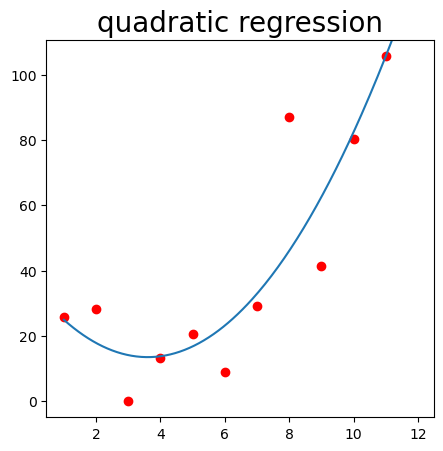

In [8]:
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='quadratic regression', fontdict={'fontsize':20})
axes = f.add_subplot(111)
axes.plot(X[:,0], y, 'ro', x[:,0], y_hat.reshape((-1,)))
#axes = plt.gca()
axes.set_ylim([np.min(y)-5, np.max(y) +5])

Jetzt berechnen wir die Parameter der Multiplen Linearen Regression mit Hilfe der hergeleiteten Formeln. Hierfür fügen wir zu den bisherigen Variablen $x$ und $x^2$ noch eine Einser-Spalte für den intercpet ein. `np.dot` berechnet das dot-product zweier Variablen. Um das Kreuzprodukt von $\mathbf{X}$ berechnen zu können, muss eine der beiden Matrizen transponiert werden. Dies geschieht durch `.T`.<br>
`inv` invertiert das Kreuzprodukt.<br>


`coefs = np.dot(np.dot(inv(np.dot(X_intercept.T,X_intercept)),X_intercept.T),y)` ist gleichbedeutend mit:

\begin{equation*}
\mathbf{b}=(\mathbf{X}'\mathbf{X})^{-1}\mathbf{X}'\mathbf{y}
\end{equation*}

In [9]:
# again we can compare the parameters of the model with those resulting from 
# our derived equation:
# b=(X'X)^{-1} X'y
from numpy.linalg import inv

# first we have to add the intercept into our X-Variable; we rename it X_intercept
X_intercept = np.c_[np.ones(X.shape[0]), X]
coefs = np.dot(np.dot(inv(np.dot(X_intercept.T,X_intercept)),X_intercept.T),y)
print(f'the parameter b is the coefficient of the linear model {model.coef_}')
print(f'the parameter a is called the intercept of the model because it indicates\n where the regression line intercepts the y-axis at x=0 {model.intercept_}')

print(f'our coefs already include the intercept: {coefs}')

the parameter b is the coefficient of the linear model [[-12.14930516   1.68570247]]
the parameter a is called the intercept of the model because it indicates
 where the regression line intercepts the y-axis at x=0 [35.33794262]
our coefs already include the intercept: [[ 35.33794262]
 [-12.14930516]
 [  1.68570247]]


### Overfitting

Nun wird diese Vorgehensweise für weitere Terme höherer Ordnung angewendet. Graphisch lässt sich zeigen, dass die Anpassung des Modells an die Daten immer besser wird, die Vorhersage für __neue Datenpunkte__ aber sehr schlecht sein dürfte. Das Polynom hat an vielen Stellen Schlenker und absurde Kurven eingebaut. Dies ist ein erstes Beispiel für __“overfitting”__.<br>  
Einen ‘perfekten’ fit erhält man, wenn man genausoviele Paramter (10 Steigunskoeffizienten + intercept) hat wie Daten-Messpunkte. 


The important points to note here:
* the fit to our empirical y-values gets better
* at the same time, the regression line starts behaving strangly
* the predictions made by the regression line in between the empirical y-values are grossly wrong: this is an example of __overfitting__

In [10]:
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')
# underdetermined, ill-posed: infinitely many solutions
X = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9]
x = np.arange(-1, 12, 0.05).reshape((-1, 1))
x = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9]
model.fit(X, y)
y_hat = np.dot(x , model.coef_.T)  + model.intercept_

(-10.0, 115.77315979942053)

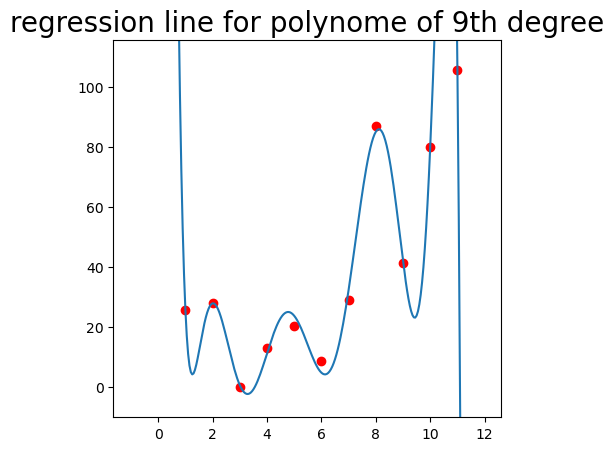

In [11]:
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='regression line for polynome of 9th degree', fontdict={'fontsize':20})
axes = f.add_subplot(111)

axes.plot(X[:,0], y, 'ro', x[:,0], y_hat.reshape((-1,)))
#axes = plt.gca()
axes.set_ylim([np.min(y)-10, np.max(y) +10])

### perfect fit: as many variables as data samples
A perfect fit is possible as is demonstrated next. We have as many variables (terms derived from x) as observations (data points). So for each data point we have a variable to accommodate it.<br>
__Note__, that a perfect fit is achieved with 10 variables + intercept. The intercept is also a parameter and in this case the number of observations $n$ equals the number of variables $p$, i.e. $p=n$.

In [12]:
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')
# underdetermined, ill-posed: infinitely many solutions
X = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10]
x = np.arange(-1, 12, 0.05).reshape((-1, 1))
x = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10]
model.fit(X, y)
y_hat = np.dot(x , model.coef_.T)  + model.intercept_

In [13]:
print(f'the intercept and the coefficients are: {model.intercept_}, {model.coef_}')

the intercept and the coefficients are: [-3441.3761578], [[ 9.78847039e+03 -1.13028575e+04  7.22272630e+03 -2.87529040e+03
   7.50863939e+02 -1.30675765e+02  1.49834150e+01 -1.08409478e+00
   4.47395935e-02 -8.00879370e-04]]


(-10.0, 125.77315979942053)

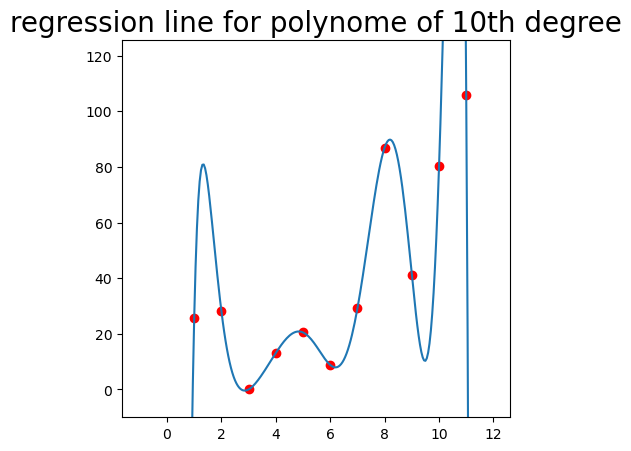

In [14]:
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='regression line for polynome of 10th degree', fontdict={'fontsize':20})
axes = f.add_subplot(111)

axes.plot(X[:,0], y, 'ro', x[:,0], y_hat.reshape((-1,)))
#axes = plt.gca()
axes.set_ylim([np.min(y)-10, np.max(y) +20])

## What happens if we have more variables than data points?

Gibt es mehr Parameter als Datenpunkte, existieren unendlich viele Lösungen und das Problem ist nicht mehr eindeutig lösbar. Früher gelang die Inversion des Kreuzproduktes der Variablen $\mathbf{X}'\mathbf{X}$ nicht. Mittlerweile gibt es Näherungsverfahren, die dennoch Ergebnisse liefern - wenn auch sehr Ungenaue.

Mittlerweile gibt es aber mathematische Näherungsverfahren die es ermöglichen auch singuläre Matrizen zu invertieren.
`numpy` verwendet hierfür die sogenannte LU-decomposition.

One way to see in python that the solution is erroneous is to use the `scipy.linalg.solve` package and solve for the matix S that solves $(\mathbf{X}'\mathbf{X})^{-1} \mathbf{S} = \mathbf{I}$.<br> $\mathbf{I}$ is called the eye-matrix wih 1s in the diagonale and zeros otherwise:

$$
\mathbf{I}=\left[
\begin{array}{ccc}
   1 & \cdots & 0 \\
   \vdots & \ddots & \vdots \\
   0 & \cdots & 1
\end{array}
\right]
$$

Die entscheidende Zeile im nachfolgenden Code ist:<br>
`S = solve(inv(np.dot(X.T, X)), np.eye(13))`

Sie besagt: gib mir die Matrix $\mathbf{S}$, die multipliziert mit $(\mathbf{X}'\mathbf{X})^{-1}$ die Matrix $\mathbf{I}$ gibt.<br>
Für unseren Fall von mehr Variablen als Beobachtungspunkten werden wir gewarnt, dass das Ergebnis falsch sein könnte. Mit älteren Mathematik- oder Statistik-Programmen ist dies überhaupt nicht möglich.

In [15]:
warnings.filterwarnings("default")
from numpy.linalg import inv
from scipy.linalg import solve
model = LinearRegression()
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')

# underdetermined, ill-posed: infinitely many solutions
X = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10, X**11, X**12, X**13]

# this should give at least a warning, because matrix inversion as done above is not possible
# any more, due to singular covariance matrix [X'X]
model.fit(X, y)
#y_hat = np.dot(x , model.coef_.T)  + model.intercept_
S = solve(inv(np.dot(X.T, X)), np.eye(13))

/home/martin/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: LinAlgWarning: Ill-conditioned matrix (rcond=3.8573e-21): result may not be accurate.
  from ipykernel import kernelapp as app


#### statistical package R
In der statistischen Programmiersprache R wird keine Warnung herausgegeben. Es werden einfach nur soviele Koeffizienten (intercept ist auch ein Koeffizient) berechnet, wie möglich ist. Alle weiteren Koeffizienten sind `NA`.

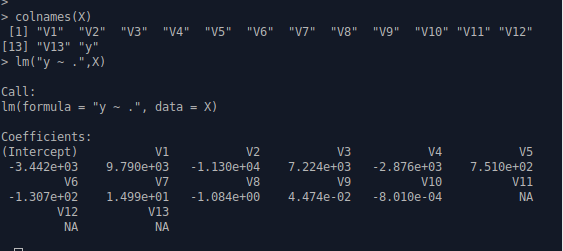

In [16]:
warnings.filterwarnings("ignore")
Image("../images/R_inverse_example.png")
# <img alt="taken from homepage of 20 newsgroups" caption="The different categories of the newsgroup posts" id="20_newsgroups" src="../images/R_inverse_example.png" width="640" height="640">

# Dealing with overfitting
Wie wir gesehen haben tendiert klassische Lineare Regression zu 'overfitting' sobald es wenige Datenpunkte gibt und mehrere Koeffizienten berechnet werden. <br>
Eine Lösung für dieses Problem ist, die Koeffizienten $b_1, b_2, b_3, \ldots$ kleiner zu machen. Dies kann erreicht werden, wenn der Fehler der Regression mit grösseren Koeffizienten auch grösser wird. Um nun das Minimum der Fehlerfunktion zu finden ist ein probates Mittel, die Koeffizienten kleiner zu machen und somit implizit 'overfitting' zu verhindern.<br>
Parameter können jetzt nur noch sehr gross werden, wenn dadurch gleichzeitig der Fehler stark reduziert werden kann.

Nachfolgend wird ein Strafterm ('penalty') für grosse Parameter eingeführt. Im Falle der Ridge-Regression gehen die Koeffizienten quadriert in die Fehlerfunktion mit ein. Der Gewichtungsfaktor $\lambda$ bestimmt die Höhe des Strafterms und ist ein zusätzlicher Parameter für den -- je nach Datensatz -- ein optimaler Wert gefunden werden muss.

## Ridge regression

Remember this formula:
\begin{equation*}\sum_i^{n}(y_i - \hat{y_i})^2 = \sum_i^{n}[y_i - (a + b\cdot x_i)]^{2}\end{equation*}

To make the error term bigger, we could simply add $\lambda\cdot b^2$ to the error:

\begin{equation*}\sum_i^{n}(y_i - \hat{y_i})^2 + \lambda b^2= \sum_i^{n}[y_i - (a + b\cdot x_i)]^{2}+ \lambda b^2\end{equation*}

The parameter $\lambda$ is for scaling the amount of shrinkage.
Die beiden Ausdrücke 
\begin{equation}\sum_i^{n}[y_i - (a + b\cdot x_i)]^{2}\label{eq:fehler}\end{equation} und 
\begin{equation}\lambda b^2\label{eq:ridge_error}\end{equation} 
sind wie Antagonisten. Der Koeffizient $b$ darf nur gross werden, wenn er es vermag $\eqref{eq:fehler}$ stark zu verkleinern, so dass der Zugewinn in $\eqref{eq:fehler}$ den Strafterm in $\eqref{eq:ridge_error}$ überwiegt.


For two variables we can write:

\begin{equation*}\sum_i^{n}(y_i - \hat{y_i})^2 + \lambda b_1^2 + \lambda b_2^2= \sum_i^{n}[y_i - (a + b_1\cdot x_{i1} + b_2\cdot x_{i2})]^{2}+ \lambda b_1^2 + \lambda b_2^2\end{equation*}

And in matrix notation for an arbitrary number of variables:
\begin{align*}
    \text{min}=&(\mathbf{y}-\hat{\mathbf{y}})^2 + \lambda \mathbf{b}^2=(\mathbf{y}-\mathbf{X}\mathbf{b})'(\mathbf{y}-\mathbf{X}\mathbf{b}) + \lambda \mathbf{b}'\mathbf{b}
\end{align*}
  
  

Interessanterweise gibt es für diesen Fall ebenfalls eine exakte analytische Lösung. <br>
Allerdings haben wir den intercept Koeffizienten $a$ mit in $\mathbf{b}$ aufgenommen und die zusätzliche Spalte mit lauter Einsern in $\mathbf{X}$ hinzugefügt. Wenn wir nun $\lambda \mathbf{b}'\mathbf{b}$ berechnen, den quadrierten Strafterm für den Parametervektor, dann würden wir auch $a$ bestrafen. Die Rolle von $a$ ist aber, die Höhenlage der Regressionsfunktion zu definieren (die Stelle an der die Funktion die y-Achse schneidet).<br>
Der intercept $a$ kann allerdings aus der Gleichung genommen werden, wenn die Variablen vorher standardisiert werden (Mittelwert $\bar{x} = 0$ und $\bar{y} = 0$). Jetzt verschwindet $a$ von ganz allein, wenn wir die standardisierten Mittelwerte in die Gleichung für $a$ einfügen:<br>

\begin{equation*}
a=\bar{y} - b\bar{x} = 0 - b\cdot 0 = 0
\end{equation*}
<br>

Nun muss $a$ nicht mehr berücksichtigt werden und die Lösung für $\mathbf{b}$ ergibt sich zu:

\begin{equation*}\hat{\mathbf{b}} = (\mathbf{X}'\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}'\mathbf{y}\end{equation*}

Nach Hastie et al., wurde dieses Verfahren ursprünglich verwendet um 'rank deficiency' Probleme zu beheben. Wenn Die Spalten oder Zeilen einer Matrix nicht lineare unabhängig sind, so hat die Matrix nicht vollen Rang. Beispielsweise kann sich eine Spalte durch Addition anderer Spalten ergeben. In diesem Fall funktionierte die Matrix Inversion nicht zufriedenstellend. Als Lösung hat man gefunden, dass es ausreichend ist, einen kleinen positiven Betrag zu den Diagonal-Elementen der Matrix zu addieren.<br>
Dies wird nachfolgend in einem numerischen Beispiel gezeigt:<br>
  - `np.c_` fügt die einzelenne Variablen zu einer Matrix zusammen
  - `np.dot(X.T, X)` ist das bekannte Kreuzprodukt der transponierten Matrix $\mathbf{X'}$ und $\mathbf{X}$
  - `np.linalg.matrix_rank` gibt uns den Rang der Matrix
  - `np.eye(7) * 2` erstellt eine Diagonal-Matrix mit 2 in der Diagonalen und 0 überall sonst

In [17]:
warnings.filterwarnings("ignore")
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')

In [18]:
X_6 = np.c_[X, X**2, X**3, X**4, X**5, X**6]
print(f'With 6 variables (polynom of 6th degree), the rank of the quare matrix\n is '\
      + f'{np.linalg.matrix_rank(np.dot(X_6.T, X_6))}')

X_7 = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7]
print(f'With 7 variables (polynom of 7th degree), the rank of the quare matrix\n is '\
      + f'{np.linalg.matrix_rank(np.dot(X_7.T, X_7))}')

print(f'By adding a small amount to the diagonal of the matrix, it is of full rank\n again: '\
     + f'{np.linalg.matrix_rank(np.dot(X_7.T, X_7) + np.eye(7) * 2)}')
## you can see how small this amount is, by having a glimpse on the diagonal elements:
print('\nto see how small the added amount in reality is, we display the diagonal elements:')
np.diag(np.dot(X_7.T, X_7))

With 6 variables (polynom of 6th degree), the rank of the quare matrix
 is 6
With 7 variables (polynom of 7th degree), the rank of the quare matrix
 is 6
By adding a small amount to the diagonal of the matrix, it is of full rank
 again: 7

to see how small the added amount in reality is, we display the diagonal elements:


array([            506,           39974,         3749966,       382090214,
           40851766526,   4505856912854, 507787636536686])

### example of ridge regression
Next, we will apply ridge regression as implemented in the python `sklearn` library and compare the results to the linear algebra solution. Note, that we have to center the variables.
* we can center $\mathbf{X}$ and $\mathbf{y}$ and display the result in the centered coordinate system
* or we can center $\mathbf{X}$ and add the mean of $\mathbf{y}$ to the predicted values to display the result in the original coordinate system. This approaches allows for an easy comparison to the overfitted result

Die Zeile `Xc = X - np.mean(X, axis=0)` standardisiert die Variablen auf den Mittelwert von 0

In [19]:
from sklearn.linear_model import Ridge
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')

X = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7]
# here is the necessary standardization:
Xc = X - np.mean(X, axis=0)

# for plotting purpose
x = np.arange(-1, 12, 0.05).reshape((-1, 1))
x = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7]
xc = x -np.mean(x, axis = 0)

# the result as obtained from the sklearn library
model = Ridge(alpha=2, fit_intercept=False)
model.fit(Xc, y)
print(f'the parameters from the sklearn library:\n'\
     + f'{model.coef_}')

# the analytical result as discussed above
inverse = np.linalg.inv(np.dot(np.transpose(Xc), Xc) + np.eye(Xc.shape[1]) * 2)
Xy = np.dot(np.transpose(Xc),y)
params = np.dot(inverse, Xy)
print(f'the parameters as obtained from the analytical solution:\n'
     + f'{np.transpose(params)}')
params_ridge = params

the parameters from the sklearn library:
[[-1.96523108e-01 -6.47914003e-01 -9.37247119e-01  1.55320112e-01
   3.20681202e-02 -6.80277139e-03  3.08899915e-04]]
the parameters as obtained from the analytical solution:
[[-1.96523119e-01 -6.47914004e-01 -9.37247118e-01  1.55320112e-01
   3.20681203e-02 -6.80277139e-03  3.08899915e-04]]


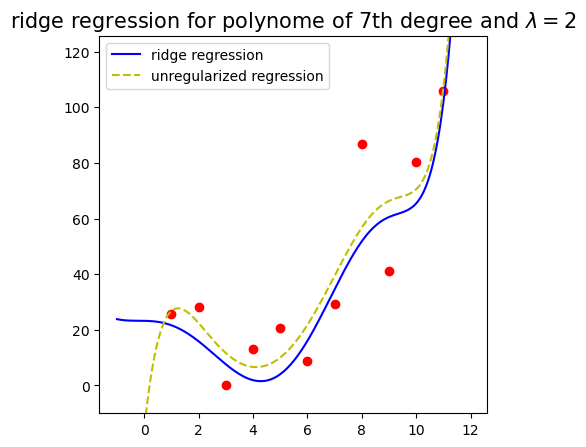

In [20]:
# here we add the mean of y to the predictions to display results in original coord. system
y_hat = np.dot(xc , params)  + np.mean(y)

f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='ridge regression for polynome of 7th degree and $\lambda=2$', 
          fontdict={'fontsize':15})
axes = f.add_subplot(111)

axes.plot(X[:,0], y, 'ro')
axes.plot( x[:,0], y_hat.reshape((-1,)), 'b-', label='ridge regression')
#axes = plt.gca()
axes.set_ylim([np.min(y)-10, np.max(y) +20])

# now the overfitted solution
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X, y)
y_overfitted = np.dot(x , modelLR.coef_.T)  + modelLR.intercept_
axes.plot(x[:,0], y_overfitted, 'y--', label='unregularized regression')
leg = axes.legend()

## Lasso

Alternativ zu einem quadratischen Strafterm $b^2$ könnte man auch den absoluten Wert nehmen $|b|$. In diesem Fall erhält man die sog.~Lasso Regression; $\lambda\cdot |b|$ wird zum Vorhersage-Fehler addiert:

$$\sum_i^{n}(y_i - \hat{y_i})^2 + \lambda |b|= \sum_i^{n}[y_i - (a + b\cdot x_i)]^{2}+ \lambda |b|$$

Für zwei Variablen würde man folglich schreiben:

$$\sum_i^{n}(y_i - \hat{y_i})^2 + \lambda |b_1| + \lambda |b_2|= \sum_i^{n}[y_i - (a + b_1\cdot x_{i1} + b_2\cdot x_{i2})]^{2}+ \lambda |b_1| + \lambda |b_2|$$
  
Leider gibt es im Gegesatz zur Ridge Regression keine eindeutige analytische Lösung um die Koeffizienten der Lasso Regression zu erhalten. Hier kommen iterative Verfahren zum Einsatz, wie wir sie in Session 2 kennen lernen werden.

#### Vergleich der Koeffizienten der Lasso Regression mit denen der Ridge Regression
Next, we will apply lasso regression as implemented in the python sklearn library and compare the results to the unconstraint regression results.<br>
As before, we have to center the variables (-> see discussion above)

In [21]:
import numpy as np
from sklearn.linear_model import Lasso
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')

X = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7]
Xc = X - np.mean(X, axis=0)

# for plotting purpose
x = np.arange(-1, 12, 0.05).reshape((-1, 1))
x = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7]
xc = x -np.mean(x, axis = 0)

# the result as obtained from the sklearn library
model = Lasso(alpha=2, fit_intercept=False)
model.fit(Xc, y)
params_lasso = model.coef_

# comparison of parameters ridge vs. lasso:
print(f'the parameters of the ridge regression:\n'\
     + f'{np.transpose(params_ridge)}')

print(f'the parameters of the lasso regression:\n'\
     + f'{params_lasso}')

the parameters of the ridge regression:
[[-1.96523119e-01 -6.47914004e-01 -9.37247118e-01  1.55320112e-01
   3.20681203e-02 -6.80277139e-03  3.08899915e-04]]
the parameters of the lasso regression:
[-0.00000000e+00 -1.27169261e+00  2.49755651e-01  7.47152651e-04
 -5.77539403e-04 -2.73002774e-05  1.76588437e-06]


Ridge Regression tendiert dazu alle Koeffizienten im gleichen Mass zu verkleinern. Lasso führt oft zu Lösungen, bei denen einige Koeffizienten ganz zu $0$ konvergiert sind. Wenn man die Ergebnisse im obigen Beispiel betrachtet, fällt einem auf dass für Lasso eigentlich nur zwei Koeffizienten verschieden von $0$ sind (for $X^2$ and $X^3$).<br>
Die Werte alle anderen Koeffizienten sind kleiner als $0.000747 = 7.47\text{e}-04$.

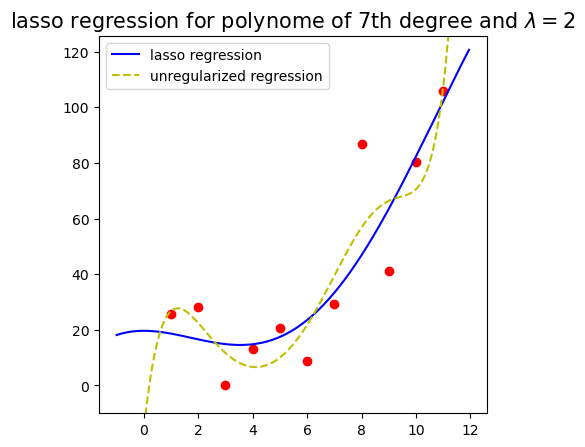

In [22]:
y_hat = np.dot(xc, model.coef_.reshape((-1,1))) + np.mean(y)
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='lasso regression for polynome of 7th degree and $\lambda=2$', 
          fontdict={'fontsize':15})
axes = f.add_subplot(111)

axes.plot(X[:,0], y, 'ro')
axes.plot( x[:,0], y_hat.reshape((-1,)), 'b-', label='lasso regression')          
#axes = plt.gca()
axes.set_ylim([np.min(y)-10, np.max(y) +20])

# now the overfitted solution
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X, y)
y_overfitted = np.dot(x , modelLR.coef_.T)  + modelLR.intercept_
axes.plot(x[:,0], y_overfitted, 'y--', label='unregularized regression')
leg = axes.legend()



## the difference between ridge and lasso


In der folgenden graphischen Darstellung haben die __wahren Koeffizienten__ die Werte $b_1=1.5,\quad b_2=0.5$. Für ein grid aus beliebigen Werten für $b_1$ und $b_2$ wird der __mean squared error__ (MSE) berechnet und der Fehler als Kontur graphisch dargestellt. Wie man sieht, wird der Fehler umso geringer, je näher die Koeffizienten im grid an den wahren Koeffizienten liegen.<br>
Als nächstes werden alle Koeffizienten-Kombinationen aus $b_1$ und $b_2$ eingetragen, deren Strafterm ($b_1^2 + b_2^2$
im Falle von Ridge und $b_1 + b_2$ im Falle von Lasso) den Wert von $1.0$ nicht übersteigt. Die Lösung, die den __wahren Koeffizienten__ am nähesten ist, wird jeweils durch einen Punkt eingezeichnet.<br>

Hierbei sieht man, dass sich die besten Lösungen von 
Ridge auf einem Halbkreis bewegen, die von Lasso auf einem Dreieck. An der Stelle, an der die Lasso-Lösung der eigentlichen Lösung (b=1.5, b2=0.5) am Nähesten ist, ist ein Parameter ($b_2$) fast $0$. Das zeigt die Tendenz von Lasso, einige Parameter gegen $0$ zu schrumpfen. Dieses Verhalten kann man sich zum Beispiel bei Variablen-Selektion zu Nutzen machen.<br>

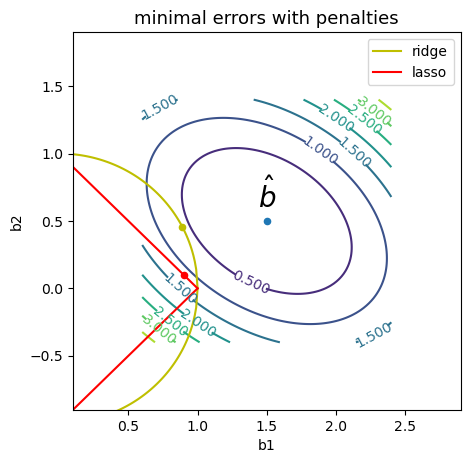

optimal coefficients of the ridge solution: 0.888888888888889 and 0.4581228472908511
optimal coefficients of the lasso solution: 0.8989898989898991 and 0.10101010101010088


In [23]:
# generation of random data set:
X1 = np.random.normal(loc = 1.0, scale = 0.8, size = 100)
X2 = np.random.normal(loc = 0.5, scale = 1.2, size = 100)
beta1 = 1.5
beta2 = 0.5
Y = beta1 * X1 + beta2 * X2
X = np.c_[X1, X2]

# test with linear regression 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)
model.intercept_ # essentiall zero
model.coef_ # essentially 0.2 and 0.5
#print(f'the model parameters from data generation could be recovered: {model.coef_}')

# make regular grid of values for b_1 and b_2
b1 = np.linspace(beta1 - 0.9, beta1 + 0.9, 100)
b2 = np.linspace(beta2 - 0.9, beta2 + 0.9, 100)
bb1, bb2 = np.meshgrid(b1, b2)

# compute MSE-error
Yhat = bb1.reshape(-1, 1) * X1.reshape(1, -1) + bb2.reshape(-1, 1) * X2.reshape(1, -1)
errors = np.square(Yhat - Y.reshape(1, -1))
error = np.sum(errors, axis = 1)/len(Y)
error_to_plot = error.reshape(bb1.shape)

# plot MSE-error contour
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='minimal errors with penalties', fontdict={'fontsize':13})
axes = f.add_subplot(111)
cp = plt.contour(bb1, bb2, error_to_plot)
plt.clabel(cp, inline=1, fontsize=10)
axes.set_xlabel('b1') 
axes.set_ylabel('b2')
axes.set_ylim([np.min(b2)-0.5, np.max(b2) + 0.5])
axes.set_xlim([np.min(b1)-0.5, np.max(b1) + 0.5])


# plot optimal solution
axes.scatter(beta1, beta2, s = 20)
axes.annotate('$\hat{b}$', xy=(beta1 , beta2 + 0.1), xycoords='data',
              horizontalalignment = 'center', size = 20)             

# all ridge solutions with a penalty budget of 1
constraint_error = 1.0
values = np.linspace(0, 1.0, 100)
constraint_l2 = np.sqrt(constraint_error - values**2)
axes.plot(values, constraint_l2, 'y-', label = 'ridge')
axes.plot(-values, constraint_l2, 'y-')
axes.plot(values, -constraint_l2, 'y-')

# all lasso solutions with a penalty budget of 1
constraint_l1 = constraint_error -values
axes.plot(values, constraint_l1, 'r-', label = 'lasso')
axes.plot(-values, constraint_l1, 'r-')
axes.plot(values, -constraint_l1, 'r-')

# best ridge solution with penalty budget of 1
Yhat_ridge = np.concatenate((values, values)).reshape(-1,1) * X1.reshape(1, -1) + \
np.concatenate((constraint_l2, -constraint_l2)).reshape(-1,1) * X2.reshape(1, -1)
errors_ridge = np.square(Yhat_ridge - Y.reshape(1, -1))
error_ridge = np.sum(errors_ridge, axis = 1)/len(Y)
index_ridge = np.where(error_ridge ==np.amin(error_ridge))[0][0]
axes.scatter(np.concatenate((values, values))[index_ridge],
             np.concatenate((constraint_l2, -constraint_l2))[index_ridge],
             s=20, c='y')

# best lasso solution with penalty budget of 1
Yhat_lasso = np.concatenate((values, values)).reshape(-1,1) * X1.reshape(1, -1) + \
np.concatenate((constraint_l1, -constraint_l1)).reshape(-1,1) * X2.reshape(1, -1)
errors_lasso = np.square(Yhat_lasso - Y.reshape(1, -1))
error_lasso = np.sum(errors_lasso, axis = 1)/len(Y)
index_lasso = np.where(error_lasso ==np.amin(error_lasso))[0][0]
axes.scatter(np.concatenate((values, values))[index_lasso],
             np.concatenate((constraint_l1, -constraint_l1))[index_lasso],
             s=20, c='r')


legs = axes.legend()
plt.show()
print(f'optimal coefficients of the ridge solution: {np.concatenate((values, values))[index_ridge]}'\
      f' and {np.concatenate((constraint_l2, -constraint_l2))[index_ridge]}')

print(f'optimal coefficients of the lasso solution: {np.concatenate((values, values))[index_lasso]}'\
      f' and {np.concatenate((constraint_l1, -constraint_l1))[index_lasso]}')


# ElasticNet


Aus der Physik kommend werden die Strafterme von Ridge und Lasso als $\text{L}_2$ und $\text{L}_1$ bezeichnet. Eigentlich ist die $\text{L}_2$-Norm die Quadratwurzel der Summe der quadrierten Elemente eines Vectors und die $\text{L}_1$-Norm nur die Summe der Vektorelemente.<br>
ElasticNet ist ein lineares Regressions-Verfahren, in welches sowohl die regularization-terms von Lasso ($\text{L}_1$), als auch von Ridge ($\text{L}_2$) eingehen. Hier gibt es nicht nur einen $\lambda$-Paramter, der das Ausmass von regularization bestimmt, sondern einen zusätzlichen Parameter $\alpha$, der das Verhältnis von $\text{L}_1$ und $\text{L}_2$ regularization angibt.

Weil Ridge Regression und Lasso die Koeffizienten sehr unterschiedlich regulieren, ist als Kompromiss die Kombination aus beiden Methoden sehr beliebt geworden. 

\begin{equation*}
\lambda\sum_j (\alpha b_j^2 + (1-\alpha)|b_j|)
\end{equation*}

Die Interpretation der beiden paramter $\lambda$ und $\alpha$ ist wie folgt:
 - $\lambda$ bestimmt das generelle Mass an regularisation
 - $\alpha$ gibt das Verhältnis an, mit dem diese beiden Strafterme indie regularisation einfliessen sollen
<br>


Im Übungs-Notebook zu den Boston house-prices werden wir ElasticNet verwenden.

# Interaction
Interaktionen sind ein weiteres wichtiges Konzept in der linearen Regression. Hier ist der Effekt einer Variablen auf die abhängige Variable $y$ abhängig von dem Wert einer anderen Variable. 

In unterem Beispiel versuchen wir die Wahrscheinlichkeit zu modellieren, dass eine Person ein Haus kauft. Natürlich ist das monatliche Einkommen eine wichtige Variable und desto höher dieses, desto wahrscheinlicher auch, dass besagte Person ein Haus kauft. Eine andere wichtige Variable ist der Zivilstand. Verheiratet Personen mit Kindern im Haushalt tendieren stark zu Hauskauf, besonders wenn das monatliche Einkommen hoch ist. Auf der anderen Seite werden Singles, auch wenn sie ein hohes Einkommen haben, eher nicht zum Hauskauf tendieren.<br>
Wir sehen also, die Variable "monatliches Einkommen" __interagiert__ mit der Variable "Zivilstand":

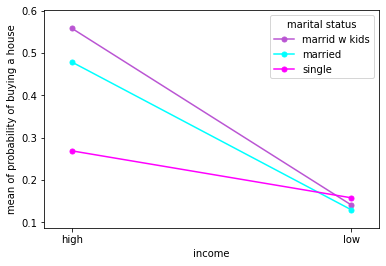

In [24]:
import numpy as np
from statsmodels.graphics.factorplots import interaction_plot
import pandas as pd

income = np.random.randint(0, 2, size = 80) # low vs high
marital = np.random.randint(1, 4, size = 80) # single, married, married & kids

probability = np.random.rand(80) + income * np.random.rand(80) * marital
probability = (probability - np.min(probability))
probability = probability/np.max(probability)

marital = pd.Series(marital)
marital.replace(to_replace = {1:'single', 2:'married', 3:'marrid w kids'}, inplace =True)

income = pd.Series(income)
income.replace(to_replace = {0:'low', 1:'high'}, inplace = True)

fig = interaction_plot(income, marital, probability,
                       colors=['mediumorchid', 'cyan', 'fuchsia'], ms=10, xlabel='income',
                       ylabel='probability of buying a house',
                       legendtitle='marital status')


Das obige Beispiel beinhaltete kategorielle Variablen. Beispiele wie diese trifft man oft im Bereich der Varianzanalysen (ANOVA) an.<br>
Interaktions-Effekte bestehen aber auch für kontinuierliche Variablen. In diesem Fall ist es aber etwas komplizierter die Effekte zu visualisieren.<br>
Wir werden jetzt unseren eigenen Datensatz so erzeugen, dass er einen deutlichen Interaktions-Effekt aufweist. Damit der Effekt zwischen 2 kontinuierlichen Variablen überhaut in 2D dargestellt werden kann, musss eine der beiden Variablen wieder diskretisiert werden, d.h. wir müssen für sie wieder Kategorien bilden.<br>
Im nächsten Rechenbeispiel versuchen wir dann, die Parameter, die zur Generierung der Daten gedient haben mit einer Linearen-Regressions-Analyse wieder zu finden.<br>
Die Daten wurden nach folgendem Modell generiert:

\begin{equation*}
y = 2\cdot x + -2\cdot m + -7\cdot (x\cdot m) + \text{np.random.normal(loc = 0, scale = 4, size = n)}
\end{equation*}

`np.random.normal(loc=0, scale=4, size=n)` ist der Random-Error-Term, den wir hinzufügen, damit die Daten nicht alle auf einer Lienie liegen. `loc=0` besagt, dass der Mittelwert unseres zufälligen Fehlers $0$ ist, `scale=4`, dass die Varianz der Werte $4$ ist und `size=n` gibt die Anzahl der zu generierenden zufälligen Werte an

Folgliche haben wir also die Koeffizienten:
 - $b_x = 2$
 - $b_m = -2$
 - $b_{x\cdot m} = -7$

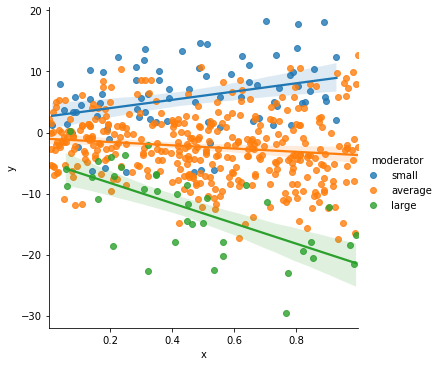

In [25]:
import seaborn as sns
n = 500
x = np.random.uniform(size=n)
m = np.random.normal(loc = 0.5, scale = 1, size = n)

#  lin effects + interaction + random error
y = 2*x + -2*m + -7*(x*m) + np.random.normal(loc = 0, scale = 4, size = n)

newM = pd.cut(m, bins=3, labels = ['small', 'average', 'large'])


toy = pd.DataFrame({'x' : x, 'y' : y, 'moderator' : newM})
sns.lmplot(x="x", y="y", hue="moderator", data=toy);

Interaktions-Terme können gebildet werden, indem man zwei Variablen elemente-weise miteinander multipliziert.
Durch die Hinzuname weiterer Terme sollte die Modell-Anpassung eigentlich besser werden - besonders wenn ein starker Interaktionsterm in den Daten vorliegt, so wie wir ihn eingebaut haben.<br>
Vergleichen wir die Koeffizienten, so wie sie im Linearen-Modell gefunden werden mit denen, die zur Erzeugung unseres Datensatzes gedient haben. Gar nicht schlecht, oder? Die zufälligen Fehler mit der grossen Varianz sorgen natürlich dafür, dass sie dennoch von den 'generating parameters' verschieden sind.

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = np.c_[x, m]
model.fit(X, y)
y_hat = model.intercept_  + np.dot(X, model.coef_)
print(f'without considering the interaction, the mse is: {np.mean((y-y_hat)**2)}')

X = np.c_[x, m, x * m]
model.fit(X, y)
y_hat = model.intercept_  + np.dot(X, model.coef_)
print(f'considering the interaction, the mse drops to: {np.mean((y-y_hat)**2)}')
print(f'\nthe coefficients are given by {model.coef_}; compare these values\n to the values '\
     + f'we used for generating the data')

without considering the interaction, the mse is: 20.59039561666012
considering the interaction, the mse drops to: 16.932358091695946

the coefficients are given by [ 1.32323881 -2.15215978 -7.05045543]; compare these values
 to the values we used for generating the data


### some considerations
Die Überlegung hier veranschaulicht, dass es schon bei moderater Variablen-Anzahl sehr viele mögliche Interaktions-Terme gibt. Für die normale Lineare Regression würde die grosse Anzahl dieser Terme zum Verhängnis werden, weil dann wieder der Fall eintreten könnte indem wir die Daten overfitten oder gar mehr Variablen als Beobachtunge zur Verfügung stehen. Auch in diesem Fall kann auf die vorgestellten^ Regularisierungs-Verfahren (ElasticNet, Ridge und Lasso) zurückgegriffen werden:

Nehmen wir an, wir haben ein data-set mit 70 verschiedenen Variablen. Weil wir nichts über die Beziehungen der Variablen zur abhängigen Variable $y$ noch über die Beziehungen der Variablen untereinander wissen, sind wir geneigt eine Menge zusätzlicher 'features' für unser Modell zu erzeugen:

* wir können 70 quadratische Terme hinzufügen ($x_j^2$)
* wir können 70 kubische Terme aufnehmen ($x_j^3$)
* wir können auch $\binom{70}{2} = 2415$ Interaktionen erster Ordnung zwischen den 70 Variablen annehmen
* anstatt dessen könnte wir auch die Interaktions-Terme der 210 (70 Variablen + 70 quadratische Terme + 70 kubische Terme) Variablen mit aufnhemne: $\binom{210}{2} = 21945$
* neben quadratisch und kubischen Termen gibt es auch viele andere linearisierende Transformation, die unter Umständen zu besseren ergebnissen führen wie beispielsweise die log-Transformation. Im praktischen Beipiel des Bosten house-prices data-Sets werden wir die `box-cox-Transformation` kennen lernen.


Wie wir gesehen haben, kann die Anzahl möglicher Variablen sehr schnell wachsen, wenn man alle Effekte berücksichtigt, die ausschlaggebend sein könnten. Manchmal existieren sogar Interaktionseffekte zweiter Ordnund, d.h. drei Variablen sind dann daran beteiligt. <br>
Würden wir alle möglichen Variablen berücksichtigen, die sich derart bilden lassen, dann würde dies auch bei grossen Daten-Sets zu ausgeprägten 'overfitting' führen. __Aus diesem Grund wurden die regularization techniques wie das  ElasticNet und seine Komponenten, die Ridge Regression und die Lasso Regression eingeführt__.

# Wie zuversichtlich sind wir hinsichtlich unserer Modell-Vorhersagen

Selten werden wir mit unserem Modell genau die Koeffizienten schätzen können, die in der gesamten Population (alle Daten, die wir erheben könnten) anzutreffen sind. Viel öfter ist unsere Stichprobe nicht repräsentativ für die gesamte Population oder sie ist schlicht zu klein und zufällige, normalverteilte Fehler in unseren Daten beeinflussen die Schätzung der Koeffizienten. Dies umsomehr, desto mehr Variablen wir in user Modell aufnehmen.<br>
Wie können wir nun die Güte unserer Schätzung beurteilen? Hier sind mindestens zwei verschieden Fragen denkbar:

* Wie sicher sind wir mit Hinblick auf die geschätzen Koeffizienten $\mathbf{b}$?. Diese Frage ist besonders für Wissenschaftler wichtig, da die Antwort dafür ausschlaggebend ist, ob eine Hypothese beibehalten oder verworfen werden muss.
* Wie sicher sind wir uns bezüglich einzelner Vorhersagen. Dies spielt die grösste Rolle im Machine Learning Umfeld, da wir das trainierte Modell gerne in unsere Business-Abläufe integrieren würden.

Diese beiden Fragestellungen lassen sich mit Hinblick auf die Regression auch wie folgt formulieren:
   * Wie sehr ist die 'mean response', die Vorhersage unsere Regressions-Funktion von der Stichprobe abhängig. Variiert Erstere sehr stark und umfasst unter Umständen sogar den Wert $0$, dann können diese Effekte (Koeffizienten) nicht interpretiert werden.
   * Wie sehr können Beobachtungen $y$ für eine gegebene Kombination von Variablen-Werten in $\mathbf{X}$ variieren? Ist diese Variation sehr gross, so werden wir auch grosse Fehler in unseren Business-Process einbauen


## Recap of assumptions underlying regression
Dies sind Linearität (der Zusammenhang einer Variablen und der abhängigen Variablen ist linear, d.h. der selbe Steigungsparamter gilt für alle Bereiche der Variablen), Homoskedastizität (die Fehler der Regression -- die Residuen -- sind in allen Bereichen von X normal verteilt mit gleicher Varianz) und Normalität der Residuen bei gegebenem Wert von X.
Diese Voraussetzungen sind in vielen Fällen nicht erfüllt und auch bekannterweise verletzt. 


* __Linearity__: Die Regression-Funktion ist eine gute Annäherung für die Beziehung zwischen $\mathbf{X}$ and $\mathbf{y}$, d.h. ist ein quadratischer Trend in den Daten und wir haben keine quadratischen Effekte in das Modell aufgenommen, so sind die Annahmen nicht erfüllt. Die Linearität besagt nämlich, dass für den Zusammenhang einer Variablen $x$ und der abhängigen Variablen $y$ der selbe Steigungs-Koeffizient $b_x$ für all Bereich für $x$ gelten muss. Ansonsten hat das Modell einen __bias__, es schätzt einen Koeffizienten systematisch falsch.
* __Homoscedasticity__: Die Varianz unseres Vorhersagefehlers (Residuen) ist für alle Bereiche einer Variablen $x$ identisch.
* __Normality__: Die Werte der abhängigen Variablen $\mathbf{y}$ sind für einen gegeben Wert von $\mathbf{x}$ normal verteilt: $\mathbf{y}|\mathbf{x} \sim N(\mu, \sigma)$<br>

In der nächsten Graphik werden die Voraussetzungen der linearen Regression veranschaulicht:<br>
Image taken from [here](https://janhove.github.io/analysis/2019/04/11/assumptions-relevance)

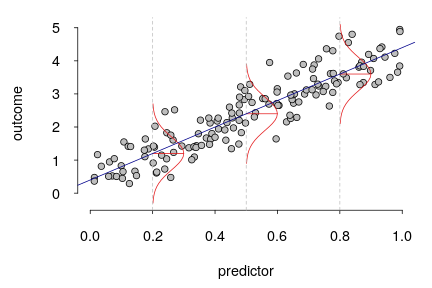

In [27]:
Image('../images/homoscedasticity.png')

Now, with respect to our confidence need:
1. __Prediction interval__: The interval around our prediction, 95% (97.5%) of all observed values are supposed to fall in; This interval is symmetrical around the regression line. This fact follows from the assumptions discussed above. The standard error of prediction (or forecast) is given by: $$\hat{\sigma}_e = \sqrt{\frac{1}{N-(p+1)}\sum_i^N e_i^2},$$
with $p$ being the number of parameters (the term $+1$ is for the intercept); $e_i$ are the residuals, i.e., the differences between the observed data points $y_i$ and the prediction $\hat{y}_i$. The confidence interval is given by:
$$ CI_i = y_i \pm t_{1-\alpha/2, N-p} \cdot \hat{\sigma}_e.$$
Here, $t_{1-\alpha/2, N-p}$ is the value of the student-t-distribution for a confidence level of $1-\alpha/2$ and $N-p$ degrees of freedom.

2. __Confidence interval__: In a similar manner (a bit more involved) we could derive the confidence interval for the predicted mean $\hat{y}_i$. Remember, that data is supposed to be normally distributed. The regression line we fit, is an estimate of the mean for a given configuration $\mathbf{x}_i$. Of course, we do not fit the empirical values exactly; some may be lying above the regression line, some beneath. This confidence interval gives an upper and a lower bound for the mean estimate, i.e. the regression line. This confidence interval is not equidistant from the regression line for all values of $\mathbf{x}$. In the regions where data is sparse, the regression line can not be estimated with high confidence. In contrast, near the mean of $\mathbf{x}$ the estimate is supposed to be more accurate (normaly distributed $\mathbf{x}$ assumed).

3. __CI for regression coefficients__: Again, the derivation of the formulae for this CI is more involved than this for the prediction interval. This interval gives the upper and lower boundary for the coefficients $\mathbf{b}$. These coefficients indicate how important the respectiv variable is in the regression equation. The interpretation of these coefficients is linked to `real` science, where the epistemological caveat is the matter of interest. For example: "is closing schools and universities related to lower base reproduction numbers ($R_0$)". This is typically not the kind of questions a data scientist is trying to answer ;-)

In the following code examples, first, we display the classical summary statistics. In the middle of the printed output, you can find the confidence intervals for the regression coefficients 'const' (intercept) and $x_1$, the $b_1$ coefficient. The plots illustrate te he points 1 and 2.<br>

If someone has a strong interest in these more statistical models, I can recommend this [source](http://web.vu.lt/mif/a.buteikis/wp-content/uploads/PE_Book/3-7-UnivarPredict.html).

In [28]:
import statsmodels.api as sm

# data example
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')

# the x (small x) is just for plotting purpose
x = np.arange(1, 12, 0.05).reshape((-1, 1))
x_intercept = np.c_[np.ones(x.shape[0]), x]


X_intercept = np.c_[np.ones(X.shape[0]), X]

ols_result_lin = sm.OLS(y, X_intercept).fit()
y_hat_lin = ols_result_lin.get_prediction(x_intercept)



dt_lin = y_hat_lin.summary_frame()
mean_lin = dt_lin['mean']
meanCIs_lin = dt_lin[['mean_ci_lower', 'mean_ci_upper']]
obsCIs_lin = dt_lin[['obs_ci_lower', 'obs_ci_upper']]

In [29]:
print(ols_result_lin.summary()) # beta-coefficients

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     12.64
Date:                Wed, 14 Jul 2021   Prob (F-statistic):            0.00616
Time:                        22:42:13   Log-Likelihood:                -49.385
No. Observations:                  11   AIC:                             102.8
Df Residuals:                       9   BIC:                             103.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4903     15.410     -0.551      0.5

(-10.0, 115.77315979942053)

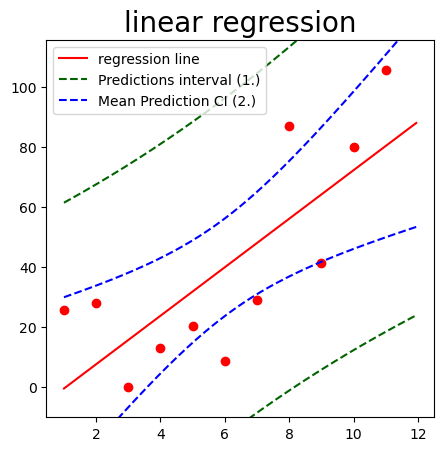

In [30]:
### figure for linear plot
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='linear regression', fontdict={'fontsize':20})
axes = f.add_subplot(111)

axes.plot(X_intercept[:,1], y, 'ro')
axes.plot(x_intercept[:, 1], mean_lin.values.reshape((-1,)), color = "red", label = "regression line")
axes.plot(x_intercept[:, 1], obsCIs_lin.iloc[:, 0], color = "darkgreen", linestyle = "--", 
         label = "Predictions interval (1.)")
axes.plot(x_intercept[:, 1], obsCIs_lin.iloc[:, 1], color = "darkgreen", linestyle = "--")

axes.plot(x_intercept[:, 1], meanCIs_lin.iloc[:, 0], color = "blue", linestyle = "--", 
         label = "Mean Prediction CI (2.)")
axes.plot(x_intercept[:, 1], meanCIs_lin.iloc[:, 1], color = "blue", linestyle = "--")
axes.legend()

axes.set_ylim([np.min(y)-10, np.max(y) +10])

The same plot is derived for an equation including a quadratic term:

In [31]:
X_intercept_quad = np.c_[X_intercept, X**2]

# for plotting:
x = np.arange(1, 12, 0.05).reshape((-1, 1))
x_intercept_quad = np.c_[np.ones(x.shape[0]), x, x**2]

ols_result_quad = sm.OLS(y, X_intercept_quad).fit()


y_hat_quad = ols_result_quad.get_prediction(x_intercept_quad)
dt_quad = y_hat_quad.summary_frame()
mean_quad = dt_quad['mean']
meanCIs_quad = dt_quad[['mean_ci_lower', 'mean_ci_upper']]
obsCIs_quad = dt_quad[['obs_ci_lower', 'obs_ci_upper']]

In [32]:
print(ols_result_quad.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     14.39
Date:                Wed, 14 Jul 2021   Prob (F-statistic):            0.00224
Time:                        22:42:14   Log-Likelihood:                -45.820
No. Observations:                  11   AIC:                             97.64
Df Residuals:                       8   BIC:                             98.83
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.3379     20.074      1.760      0.1

(-10.0, 115.77315979942053)

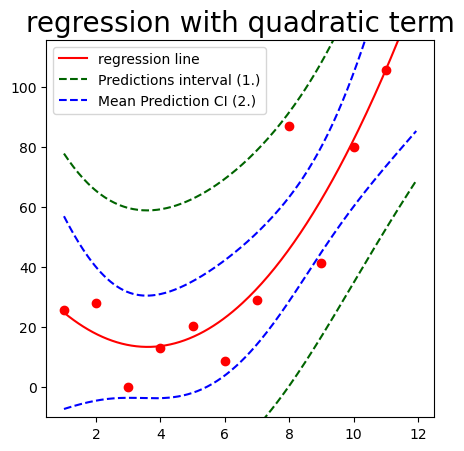

In [33]:
### figure for linear plot
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='regression with quadratic term', fontdict={'fontsize':20})
axes = f.add_subplot(111)

axes.plot(X_intercept_quad[:,1], y, 'ro')
axes.plot(x_intercept_quad[:, 1], mean_quad.values.reshape((-1,)), color = "red", label = "regression line")
axes.plot(x_intercept_quad[:, 1], obsCIs_quad.iloc[:, 0], color = "darkgreen", linestyle = "--", 
         label = "Predictions interval (1.)")
axes.plot(x_intercept_quad[:, 1], obsCIs_quad.iloc[:, 1], color = "darkgreen", linestyle = "--")

axes.plot(x_intercept_quad[:, 1], meanCIs_quad.iloc[:, 0], color = "blue", linestyle = "--", 
         label = "Mean Prediction CI (2.)")
axes.plot(x_intercept[:, 1], meanCIs_quad.iloc[:, 1], color = "blue", linestyle = "--")
axes.legend()

axes.set_ylim([np.min(y)-10, np.max(y) +10])

## Bootstrap
With real, messy data it is rather seldom to meet all the assumptions underlying the theory of confidence intervals. A robust alternative, without any assumptions is the bootstrap. We view our data sample as the population and draw samples from it, with replacement. We fit the model to each of these samples and gather the statistics of relevance. Then we report the 2.5% quantile and the 97.5% quantile as the boundaries of our confidence interval with confidence level of $\alpha=5\%$.

In [34]:
from random import choices
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')


y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')


#X = np.c_[np.ones(X.shape[0]), X, X**2, X**3, X**4]
X = np.c_[X, X**2, X**3, X**4]
x = np.arange(1, 12, 0.05).reshape((-1, 1))
#x = np.c_[np.ones(x.shape[0]), x, x**2, x**3, x**4]
x = np.c_[x, x**2, x**3, x**4]
indices = np.arange(0, X.shape[0])

drew = choices(indices, k=len(indices))

sampler = (choices(indices, k = len(indices)) for i in range(200))

CIS = np.percentile(np.array([Lasso(alpha=2, fit_intercept=True).fit(X[drew,:], y[drew, :])\
                              .predict(x).tolist()
                              for drew in sampler]), [2.5, 97.5], axis = 0)
# x is 220 long
model = Lasso(alpha=2, fit_intercept=True)
model.fit(X, y)
y_hat = model.predict(x)

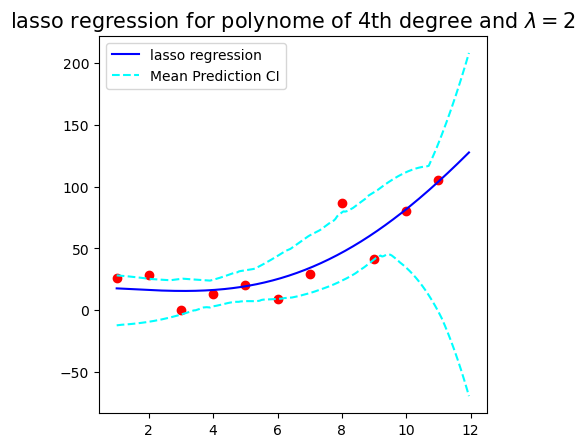

In [35]:
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='lasso regression for polynome of 4th degree and $\lambda=2$', 
          fontdict={'fontsize':15})
axes = f.add_subplot(111)

axes.plot(X[:,0], y, 'ro')
axes.plot( x[:,0], y_hat.reshape((-1,)), 'b-', label='lasso regression')

axes.plot(x[:, 0], CIS[0, :], color = "cyan", linestyle = "--", 
         label = "Mean Prediction CI")
axes.plot(x[:, 0], CIS[1, :], color = "cyan", linestyle = "--")
axes.legend()

# Extension: logistic regression and the GLM
There are other models that are relatives of the linear model that we discussed in this notebook. One of the most prominent is the __logistic regression__. This model belongs to the "__generalized__ linear model" (GLM). The GLM may not be confounded with the "__general__ linear model". The latter essentially expresses analysis of variance (ANOVA) in terms of linear regression.<br>
The __GLM__ extends the
linear regression beyond models with normal error distributions. This
remark in the corresponding wiki-article is enlightening:
[read wikipedia for this](https://en.wikipedia.org/wiki/Generalized_linear_model#Confusion_with_general_linear_models)

## exponential family of distributions
From the perspective of modern statistics the GLM comprises many
different linear models, among others the classical linear model. Every
distribution in the exponential family can be written in the following
form:
$$f(y| \theta) = \exp\left(\frac{y \theta + b(\theta)}{\Phi} + c(y, \Phi)\right),$$
where $\theta$ is called the canonical parameter that in turn is a
function of $\mu$, the mean. This function is called the canonical link
function that links $\mu$ to a linear function of the regression
parameters. In short: it is this function that linearizes the relation
between the dependent and the independent variables. For the sake of
completeness: $b(\theta)$ is a function of the canonical parameter and
hence, also depends on $\mu$. $\Phi$ is called the dispersion parameter
and $c(y, \Phi)$ is a function depending on the observation and the
dispersion parameter.

### Normal distribution

\begin{eqnarray*}
f(y| \mu, \sigma) =& (2\pi \sigma^2)^{-\frac{1}{2}} \exp\left(-\frac{1}{2}\frac{y^2 -2y\mu + \mu^2}{\sigma^2}\right) \\
 =&\quad \exp \left(\frac{y\mu -\frac{\mu^2}{2}}{\sigma^2} - \frac{1}{2}\left(\frac{y^2}{\sigma^2} + \log(2\pi\sigma^2\right)\right),\quad \text{with}
\end{eqnarray*}

$\mu = \theta(\mu)$, i.e. $\mu$ is the canonical parameter and the link
function is given by the identity function. Hence, the mean can be
modeled directly without any transformation. The dispersion parameter $\Phi$ is given by $\sigma^2$, the variance. This case is the classical
linear regression.

### Poisson distribution
Now, for the Poisson distribution we have

\begin{eqnarray*}
f(y| \mu) =& \frac{\mu^{y} e^{-\mu}}{y!} = \mu^y e^{-\mu}\frac{1}{y!}\\
=& \quad\exp\left(y \log(\mu) - \mu - \log(y!)\right), \quad\text{where}
\end{eqnarray*}

the link function is given by $\log(\mu)$. Note that the Poisson
distribution does not have any dispersion parameter.

### Bernoulli distribution $\Rightarrow$ logistic regression
And finally the Bernoulli distribution from which we derive the logistic
regression. Using the Bernoulli distribution, we can calculate the probabilities of experiments consisting of binary events. The classical example is coin flipping. Here, $\pi$ is the probability of the coin showing 'head'; $(1-\pi)$ is the probability of the coin showing 'tail'. We can now calculate the probability of getting exactly 7 times head for 10 tosses with a fair coin:
$$\pi^7 (1-\pi)^3 = 0.5^7 0.5^3 = 0.5^{10} = 0.0009765625$$

Next, I demonstrate how we can rewrite the Bernoulli distribution to fit into the framework of the exponential family:
\begin{eqnarray*}
f(y |\pi) =& \pi^y (1-\pi)^{1-y} = \exp\left(y \log(\pi) + (1-y) \log(1-\pi)\right)\\
= & \quad \exp\left(y \log(\pi) + \log(1-\pi) - y\log(1-\pi)\right)\\
=&\quad \exp\left(y\log(\frac{\pi}{1-\pi}) + \log(1-\pi)\right),\quad\text{where}
\end{eqnarray*}

the link function evaluates to $\log(\frac{\pi}{1-\pi})$. This function
is also called the logit function whose reverse function is the logistic
function. Hence, it is the logit that is modeled by a lineare function
of the regressors:
$\log(\frac{\pi}{1-\pi}) = a + b_{1}x_1 + \ldots + b_jx_j$. If we plug
the right hand term into the logistic function we get the estimated
probabilities:
$$P(y=1 |x) = \frac{\exp(a + b_{1}x_1 + \ldots + b_jx_j)}{1 + \exp(a + b_{1}x_1 + \ldots + b_jx_j)}.$$

Here, I showed that the classical linear regression with normal
error terms can be seen as a special case of a much wider family of
models comprising all distributions out of the exponential family. (For
a more complete treatment of other distributions see again
https://en.wikipedia.org/wiki/Generalized\_linear\_model.)

# GLMNET
In the statistical language R, there exists a library called 'glmnet'. This package implements the elastic net as we discussed here but for the glm and not only for the classical linear regession.<br>
https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html

There exists also a python package implementing glmnet by using the exact same fortran code: __glmnet-python__.<br>
There are some subtleties in the implementation that are different from the elastic net version as provided by sklearn.
https://pypi.org/project/glmnet-python/

# Neural Network
We can also cast linear regression into a neural network context. The network has no hidden layer. The activation function in the output neuron is either the identity function $y=x$ for classical linear regression or the logistic function for logistic regression.

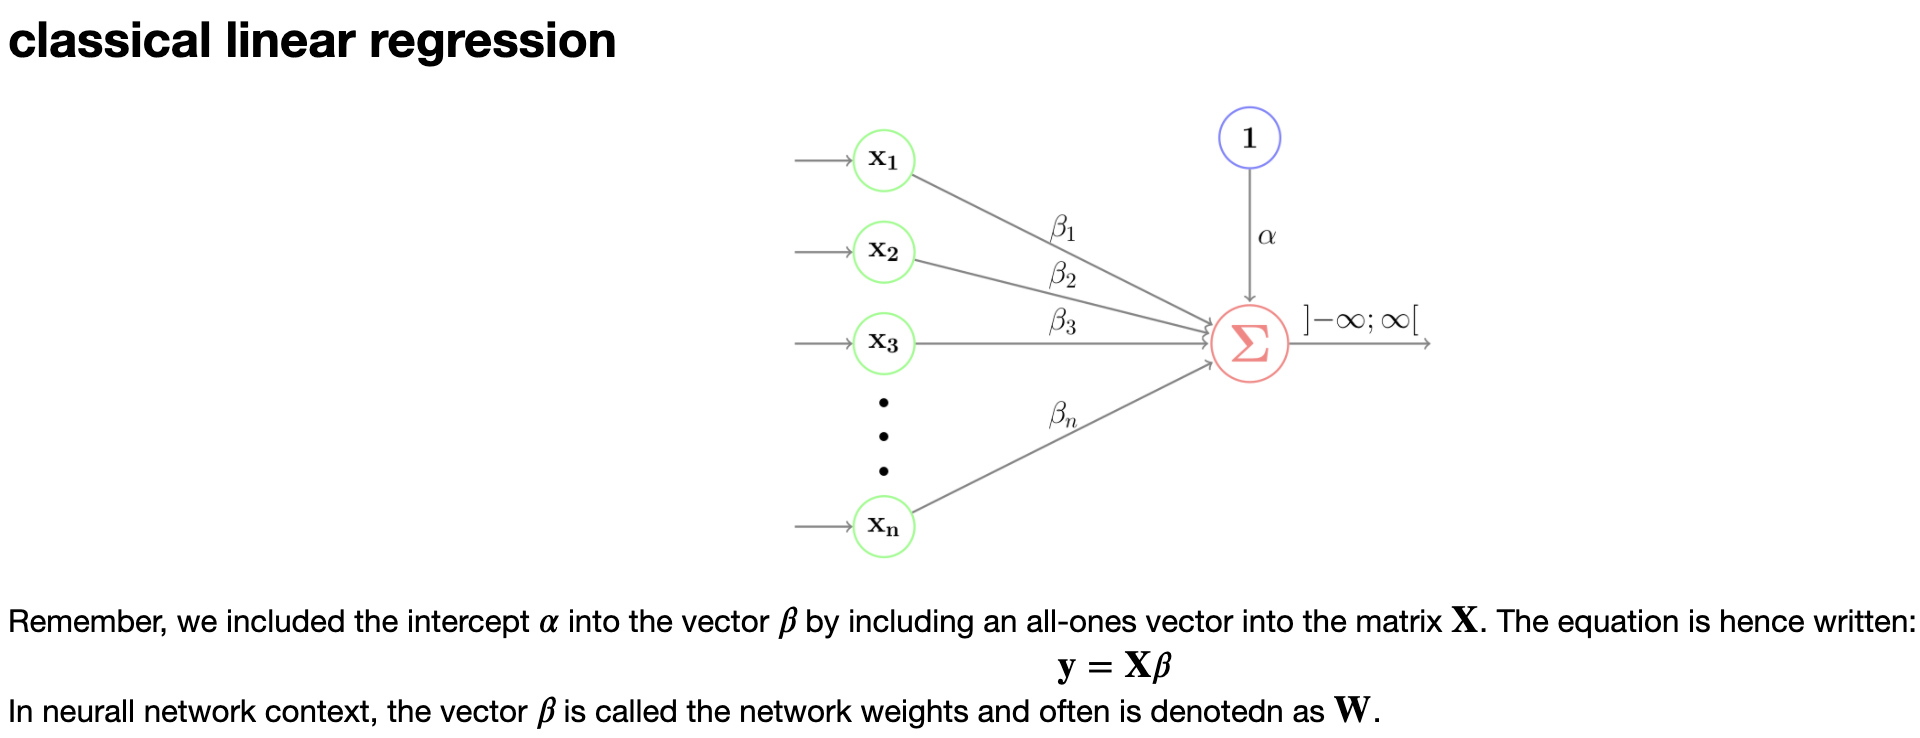

In [36]:
Image('../images/Regression_as_NN.png')

## classical linear regression

<img alt="" caption="classical linear regression viewed as a neural network with no hidden layer" id="NN_class_reg" width=300 height=300 src="../images/NN_class_reg.png">

Remember, we included the intercept $\alpha$ into the vector $\mathbf{\beta}$ by including an all-ones vector into the matrix $\mathbf{X}$. The equation is hence written: 
$$\mathbf{y} = \mathbf{X} \mathbf{\beta}$$
In neurall network context, the vector $\mathbf{\beta}$ is called the network weights and often is denotedn as $\mathbf{W}$.

Why are the weight-vectors $\mathbf{W}$ in upper-case?<br>In a regression-context, we usually use lower-case letters like $\mathbf{\beta}$ or $\mathbf{b}$?

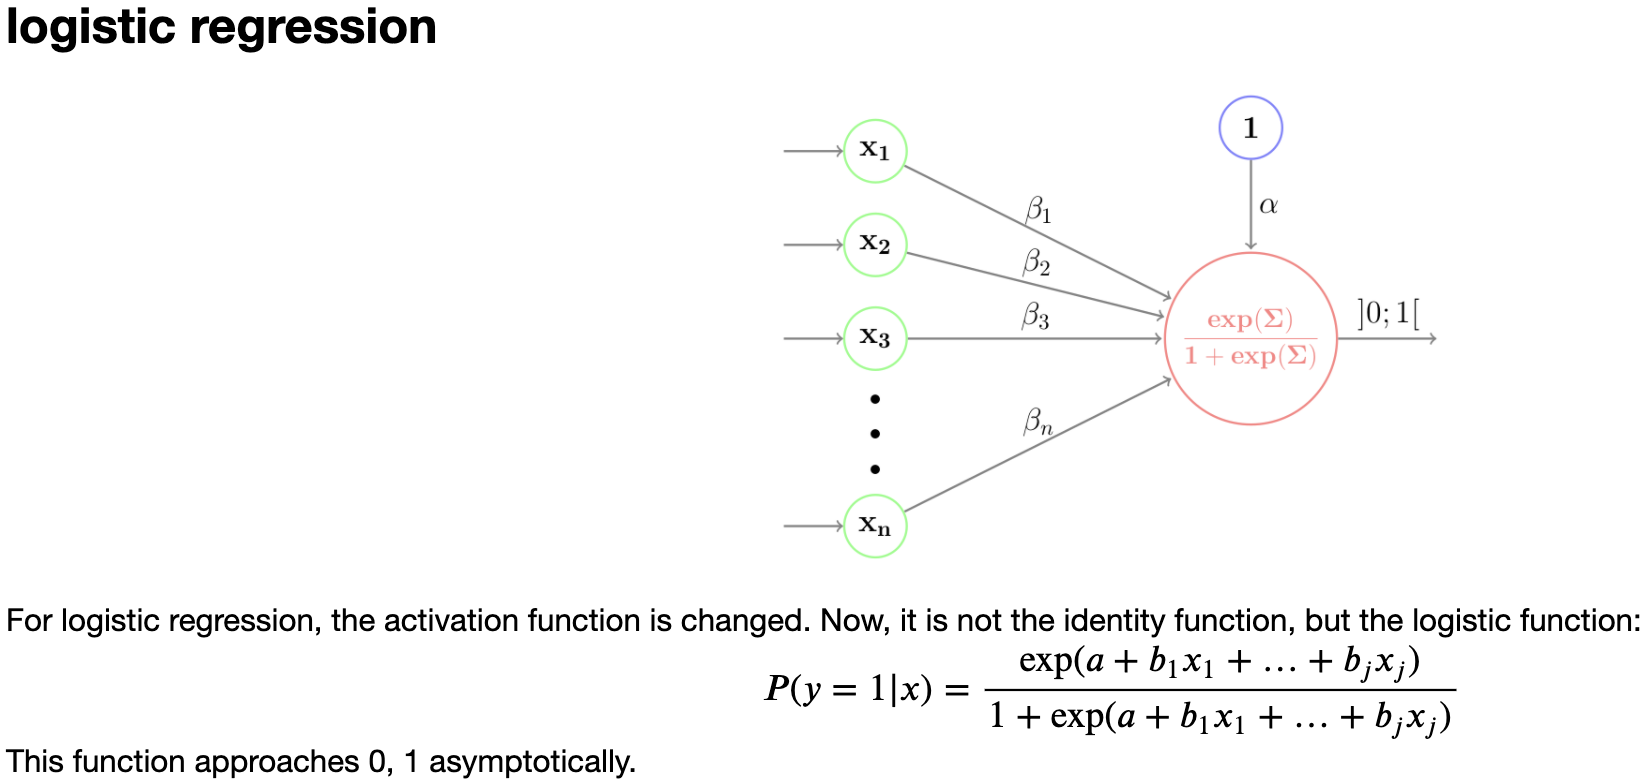

In [37]:
Image('../images/LogisticRegression_as_NN.png')

## logistic regression

<img alt="" caption="classical linear regression viewed as a neural network with no hidden layer" id="NN_logistic_reg" width=300 height=300 src="../images/NN_logistic_reg.png">

For logistic regression, the activation function is changed. Now, it is not the identity function, but the logistic function:
$$P(y=1 |x) = \frac{\exp(a + b_{1}x_1 + \ldots + b_jx_j)}{1 + \exp(a + b_{1}x_1 + \ldots + b_jx_j)}$$
This function approaches 0, 1 asymptotically.

### Weight decay
In the neural network literature, the $l_2$-penalty term is called "weight decay". It is not a parameter of the single layers or neurons, but of the optimizer. As with regularized regression, the weight decay is written:
$$L' = L + \lambda\sum_i w_i^2, $$
where $L$ is the actual loss and $w_i$ are the weights of the incoming connections of a neuron.